In [ ]:
# Import library tensorflow untuk mengerjakan tugas submission
import tensorflow as tf

In [ ]:
# Mengenali versi dari tensorflow
print(tf.__version__)

2.2.0


In [ ]:
# Pengambilan dataset yang disediakan dari dicoding
!wget --no-check-certificate \
   https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip \
  -O /tmp/rockpaperscissors.zip

--2020-06-18 06:44:47--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘/tmp/rockpaperscissors.zip’

/tmp/rockpapersciss 100%[===================>] 307.92M  11.9MB/s    in 29s     

2020-06-18 06:45:17 (10.6 MB/s) - ‘/tmp/rockpaperscissors.zip’ saved [322873683/322873683]



In [ ]:
# Melakukan ekstraksi pada file zip
import zipfile
local_zip = '/tmp/rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [ ]:
# Terlihat dari hasil ekstraksi pada folder tersebut, perlu dibuatkan 2 folder yaitu train dan validation
# Dalam kasus ini menurut saya perlu menginstall library yang mampu membagikan folder agar lebih mudah dan lebih cepat
!pip install split-folders

In [ ]:
# Sejumlah data input untuk dibagikan berada di folder rps-cv-images
input_dir = '/tmp/rockpaperscissors/rps-cv-images'
# Hasil dari pembagian disimpan dalam folder dengan nama 'output'
output_dir = '/tmp/rockpaperscissors/output'

In [ ]:
# Melakukan pembagian folder menjadi train dan validasi
import split_folders
split_folders.ratio(input_dir, output=output_dir, seed=1337, ratio=(.8, .2))

Copying files: 2188 files [00:00, 3144.04 files/s]


In [ ]:
# Persiapan untuk membuat direktori train dan validasi
import os
master_dir = '/tmp/rockpaperscissors/output'
train_dir = os.path.join(master_dir,'train')
validation_dir = os.path.join(master_dir,'val')

In [ ]:
# Pastikan 3 class sudah ada di direktori train
os.listdir(train_dir)

['rock', 'paper', 'scissors']

In [ ]:
# Pastikan 3 class sudah ada di direktori validasi
os.listdir(validation_dir)

['rock', 'paper', 'scissors']

In [ ]:
# Mengenali dataset yang kita miliki terlebih dahulu setelah melakukan pembagian dataset
train_rock_dir = os.path.join(train_dir, 'rock')
train_paper_dir = os.path.join(train_dir, 'paper')
train_scissors_dir = os.path.join(train_dir, 'scissors')

val_rock_dir = os.path.join(validation_dir, 'rock')
val_paper_dir = os.path.join(validation_dir, 'paper')
val_scissors_dir = os.path.join(validation_dir, 'scissors')

num_rock_tr = len(os.listdir(train_rock_dir))
num_paper_tr = len(os.listdir(train_paper_dir))
num_scissors_tr = len(os.listdir(train_scissors_dir))

num_rock_val = len(os.listdir(val_rock_dir))
num_paper_val = len(os.path.join(val_paper_dir))
num_scissors_val = len(os.path.join(val_scissors_dir))

total_training = num_rock_tr + num_paper_tr + num_scissors_tr
total_validation = num_rock_val + num_paper_val + num_scissors_val

print('Jumlah gambar batu yang dilatih      :', num_rock_tr)
print('Jumlah gambar kertas yang dilatih    :', num_paper_tr)
print('Jumlah gambar gunting yang dilatih   :', num_scissors_tr)
print('\nJumlah gambar batu yang divalidasi   :', num_rock_val)
print('Jumlah gambar kertas yang divalidasi :', num_paper_val)
print('Jumlah gambar gunting yang divalidasi:', num_scissors_val)
print('\n=======================================')
print('\nJumlah total gambar yang dilatih     :', total_training)
print('Jumlah total gambar yang divalidasi  :', total_validation)

Jumlah gambar batu yang dilatih      : 580
Jumlah gambar kertas yang dilatih    : 569
Jumlah gambar gunting yang dilatih   : 600

Jumlah gambar batu yang divalidasi   : 146
Jumlah gambar kertas yang divalidasi : 39
Jumlah gambar gunting yang divalidasi: 42


Jumlah total gambar yang dilatih     : 1749
Jumlah total gambar yang divalidasi  : 227


In [ ]:
# Berdasarkan informasi dataset tersebut, perlu diimplementasikan augmentasi data gambar
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range=0.2,
                    fill_mode='nearest')

val_datagen = ImageDataGenerator(
                   rescale=1./255,
                   rotation_range=20,
                   horizontal_flip=True,
                   shear_range=0.2,
                   fill_mode='nearest')

In [ ]:
# Mulai men-generate data gambar
train_generator = train_datagen.flow_from_directory(
      train_dir, # direktori data latih
      target_size=(150, 150), # mengubah resolusi seluruh gambar menjadi 256x256 piksel
      batch_size=4,
      class_mode='categorical') # mengenali setiap kelas dengan 2 dimensi array

validation_generator = val_datagen.flow_from_directory(
      validation_dir, # direktori data validasi
      target_size=(150, 150), # mengubah resolusi seluruh gambar menjadi 150x150 piksel
      batch_size=4,
      class_mode='categorical') # mengenali setiap kelas dengan 2 dimensi array

Found 1749 images belonging to 3 classes.
Found 439 images belonging to 3 classes.


In [ ]:
# Mengenali semua class di data train dengan dictionary
train_generator.class_indices

{'paper': 0, 'rock': 1, 'scissors': 2}

In [ ]:
# Mengenali semua class di data validasi dengan dictionary
validation_generator.class_indices

{'paper': 0, 'rock': 1, 'scissors': 2}

In [ ]:
# Buat model dengan metode Sequential
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPool2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPool2D(2, 2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 15, 15, 128)      

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
sejarah = model.fit(
    train_generator,
    steps_per_epoch=35, # berapa batch yang akan dieksekusi pada setiap epoch
    epochs=20,
    validation_data=validation_generator, # menampilkan akurasi pengujian data validasi
    validation_steps=5,
    verbose=2 # berapa batch yang akan dieksekusi pada setiap epoch
)

Epoch 1/20
35/35 - 14s - loss: 1.1509 - accuracy: 0.4500 - val_loss: 0.9903 - val_accuracy: 0.4000
Epoch 2/20
35/35 - 14s - loss: 1.0223 - accuracy: 0.5000 - val_loss: 0.9254 - val_accuracy: 0.4500
Epoch 3/20
35/35 - 14s - loss: 0.8581 - accuracy: 0.5929 - val_loss: 0.8018 - val_accuracy: 0.6000
Epoch 4/20
35/35 - 13s - loss: 0.5632 - accuracy: 0.7956 - val_loss: 0.2935 - val_accuracy: 0.9000
Epoch 5/20
35/35 - 14s - loss: 0.4222 - accuracy: 0.8500 - val_loss: 0.5051 - val_accuracy: 0.8000
Epoch 6/20
35/35 - 17s - loss: 0.4117 - accuracy: 0.8714 - val_loss: 0.2929 - val_accuracy: 0.9000
Epoch 7/20
35/35 - 14s - loss: 0.4142 - accuracy: 0.8571 - val_loss: 0.4901 - val_accuracy: 0.7500
Epoch 8/20
35/35 - 13s - loss: 0.3308 - accuracy: 0.8759 - val_loss: 0.3336 - val_accuracy: 0.8500
Epoch 9/20
35/35 - 13s - loss: 0.3819 - accuracy: 0.8759 - val_loss: 0.3802 - val_accuracy: 0.9000
Epoch 10/20
35/35 - 14s - loss: 0.2602 - accuracy: 0.9071 - val_loss: 1.0340 - val_accuracy: 0.7000
Epoch 11/

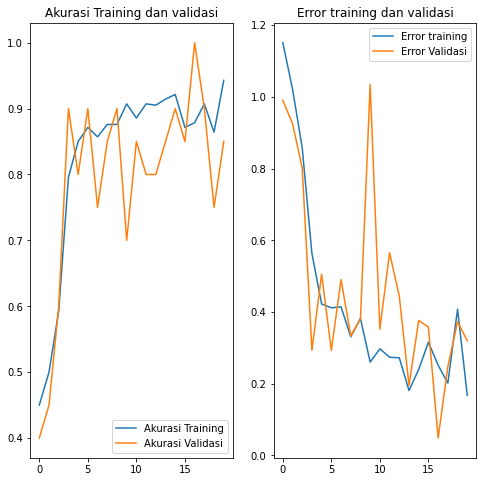

In [ ]:
import matplotlib.pyplot as plt

acc = sejarah.history['accuracy']
val_acc = sejarah.history['val_accuracy']

loss = sejarah.history['loss']
val_loss = sejarah.history['val_loss']

epochs = 20
jarak_epochs = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(jarak_epochs, acc, label='Akurasi Training')
plt.plot(jarak_epochs, val_acc, label='Akurasi Validasi')
plt.legend(loc='lower right')
plt.title('Akurasi Training dan validasi')

plt.subplot(1, 2, 2)
plt.plot(jarak_epochs, loss, label='Error training')
plt.plot(jarak_epochs, val_loss, label='Error Validasi')
plt.legend(loc='upper right')
plt.title('Error training dan validasi')
plt.show()


Saving ss1.jpeg to ss1.jpeg
ss1.jpeg
paper


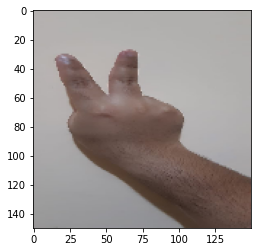

In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.image as mpimg
%matplotlib inline

uploaded = files.upload()

for fn in uploaded.keys():
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)

  print(fn)
  if classes[0][0] == 1:
    print('paper')
  elif classes[0][1] == 2:
    print('rock')
  elif classes[0][2] == 3:
    print('scissors')